# TASK - :  FOOD CASE STUDY MACDONALDS

* Task : Analyzing - FOOD CASE STUDY MACDONALDS
* Author: Amayika
* Email Address: Kashyap.amayika009@gmail.com

# Introduction

**This project involves analyzing customer perceptions and segmenting a simulated dataset for a fast-food chain, like McDonald's, to better understand its customer base. The primary objectives of this project are:**

1. Customer Segmentation: Group customers into distinct segments based on their age, gender, visit frequency, and their expressed level of liking or disliking the brand.
2. Profiling and Visualizing Segments: Identify and visualize the characteristics of each customer segment, such as gender distribution, age, visit frequency, and overall sentiment toward the brand.
3. Decision Tree Analysis: Explore the key factors that influence segment membership, providing insights into which variables best predict the clusters.
4. Segment Evaluation: Assess the attractiveness of each segment in terms of customer loyalty, preference, and visit frequency.
5. Using clustering, mosaic plots, and decision trees, this analysis aims to provide actionable insights into customer behavior and preferences. McDonald’s (or similar fast-food chains) can use these insights to tailor marketing strategies, improve customer satisfaction, and potentially increase brand loyalty by targeting segments with customized offers or messages.

**This project, though based on simulated data, showcases practical methods for conducting market segmentation, enabling stakeholders to make data-driven decisions.**

# SECTION 1 : Reading the data set using Pandas and printing the feature name with numbers of missing entries.



Steps involved to process the data are as follows:

1. We are first going to download the data file and then we will import the necessary libraries to read the data set. We will use **"pd.read_csv"** for reading the file
2. From there we will go ahead and read the data set and will get to know the shape of the data set along with the information of the data set.
3. We are going to read these two data sets using $NUMPY$ and $PANDAS$, so we will read the dataframe and perform the operations on this data frame.
4. This will help us understand the data set properly along with number of features and number of observations which are basically columns and rows present in the data set and also the object types of the data set
   



$Note$ : But before that lets import a required libraries for our experiment. So we are going to import Numpy, Pndas, scipy, Matplotlib and seaborn libraray for our operations

In [57]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
%matplotlib inline
import scipy.stats as stats
from scipy.stats import skew, iqr
from scipy.stats import spearmanr
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [58]:
# Load the data
data = pd.read_csv("mcdonalds.csv", comment = "#")

# Display the first few rows of the dataframe
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


### Here we have seen the top 5 rows of the data sets and we can see that there are 21 columns in the data set. Now we will move ahead with the information and summary of the data set.

## Lets check the Shape and information of the data set first using "info()" function-


In [59]:
data.shape

(1453, 15)

In [60]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


### Summary from the information of the data set:

1. The data set has 15 columns including $int64$ and $object$ data types
2. Almost all the columns have 1453 non null values.
3. There are total 1453 attributes in the data set

In [62]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1453.0,44.604955,14.221178,18.0,33.0,45.0,57.0,71.0


## Checking Null Values for each feature:

For checking the null values for each feature and printing the null values in each feature using **"isnull().sum()"** function  and then printing the **"Number of missing entries for each feature:"**

In [63]:
data.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [64]:
missing_entries = data.isnull().sum()
print("Number of missing entries for each feature:")
print(missing_entries)

Number of missing entries for each feature:
yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


## Part 2: Exploring the Data

In [67]:
print(data.columns)  # Check column names 

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


# Part 3: Converting Yes/No Responses to Binary Values

The survey responses in the dataset may contain "Yes" and "No" answers. To make this data easier for our analysis (like clustering), we convert "Yes" to 1 and "No" to 0 using applymap(). This step creates a new dataset, binary_data, with binary values, which is simpler to work with for machine learning models.

In [68]:
# Extract first 11 columns (segmentation variables)
MD_x = data.iloc[:, :11]

# Convert YES to 1 and NO to 0
MD_x = MD_x.applymap(lambda x: 1 if x == 'Yes' else 0)

# Calculate the average of each column
column_means = MD_x.mean().round(2)
print(column_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


### Explanation:

1. data.iloc[:, :11] selects the first 11 columns.
2. applymap() applies the conversion to each value in the DataFrame.
3. MD_x.mean().round(2) calculates the average for each column to verify the conversion, just like colMeans in R.

## Checking the correlation of the variables:

In [70]:
MD_x.corr()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
yummy,1.000000,0.253807,0.008742,-0.087027,-0.151853,0.106836,0.105036,0.687280,-0.061727,0.247183,-0.419852
convenient,0.253807,1.000000,0.028928,0.036451,-0.106948,0.243062,0.151574,0.289755,-0.163961,0.099230,-0.340797
spicy,0.008742,0.028928,1.000000,-0.041322,0.053932,0.020276,0.017203,0.061154,0.045979,0.106252,0.032834
fattening,-0.087027,0.036451,-0.041322,1.000000,0.319283,0.045600,-0.026640,-0.087561,0.089134,-0.338401,0.146054
greasy,-0.151853,-0.106948,0.053932,0.319283,1.000000,-0.058212,-0.073264,-0.163536,0.147283,-0.211186,0.321879
fast,0.106836,0.243062,0.020276,0.045600,-0.058212,1.000000,0.252133,0.145836,-0.201694,0.033596,-0.137993
cheap,0.105036,0.151574,0.017203,-0.026640,-0.073264,0.252133,1.000000,0.139485,-0.721593,0.130003,-0.125602
tasty,0.687280,0.289755,0.061154,-0.087561,-0.163536,0.145836,0.139485,1.000000,-0.104884,0.226271,-0.437086
expensive,-0.061727,-0.163961,0.045979,0.089134,0.147283,-0.201694,-0.721593,-0.104884,1.000000,-0.069873,0.199748
healthy,0.247183,0.099230,0.106252,-0.338401,-0.211186,0.033596,0.130003,0.226271,-0.069873,1.000000,-0.173722


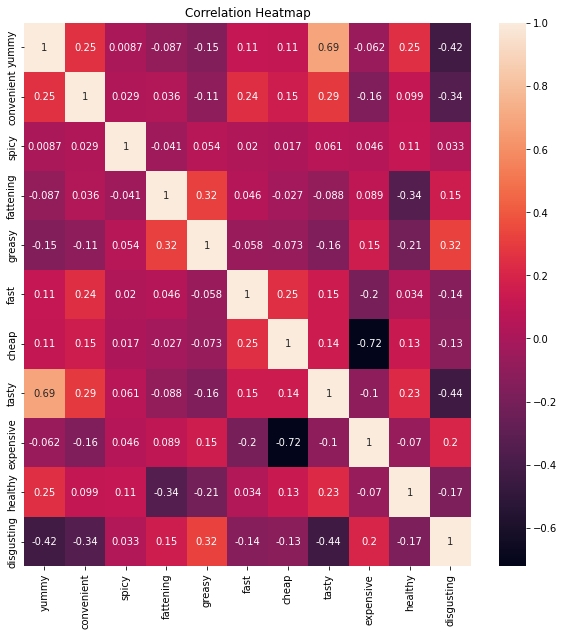

In [72]:
# Correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(MD_x.corr(), annot=True, )
plt.title('Correlation Heatmap')
plt.show()

# Part 4: Conducting Principal Component Analysis (PCA)

In [73]:
from sklearn.decomposition import PCA

# Perform PCA without standardizing since variables are binary
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# PCA summary equivalent: explained variance ratios
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
print("Proportion of Variance:", np.round(explained_variance, 4))
print("Cumulative Proportion:", np.round(cumulative_variance, 4))

Proportion of Variance: [0.2994 0.1928 0.133  0.0831 0.0595 0.0503 0.0438 0.0395 0.0368 0.0324
 0.0293]
Cumulative Proportion: [0.2994 0.4922 0.6253 0.7084 0.7679 0.8182 0.862  0.9016 0.9383 0.9707
 1.    ]


### Explanation:

1. PCA() initializes the PCA function in Python.
2. fit_transform() runs PCA on our binary MD_x data without standardization, as the original segmentation variables are binary.
3. explained_variance_ratio_ gives the proportion of variance for each principal component, while np.cumsum() provides the cumulative variance.

## Generating a Perceptual Map (Plotting the First Two Components)

- In R, plotting is done directly in base R or ggplot2. In Python, we use matplotlib and seaborn for visualization.

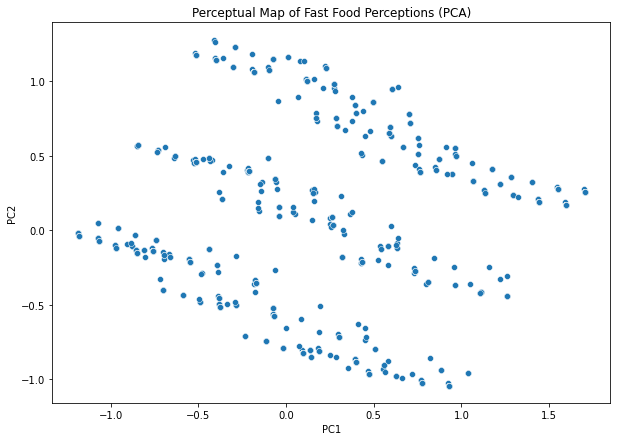

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add PCA components to the DataFrame for easy plotting
MD_x['PC1'] = MD_pca[:, 0]
MD_x['PC2'] = MD_pca[:, 1]

# Plot the first two principal components
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', data=MD_x)
plt.title('Perceptual Map of Fast Food Perceptions (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


## Principal Component Analysis and Factor Loadings

In [75]:
from sklearn.decomposition import PCA

# Assuming MD_x is the binary data (Yes/No converted to 1/0)
pca = PCA(n_components=11)
MD_pca = pca.fit(MD_x)

# Factor loadings (similar to rotation in R)
loadings = pd.DataFrame(pca.components_.T, index=MD_x.columns, columns=[f'PC{i+1}' for i in range(11)])
print("Factor Loadings:\n", loadings.round(2))


Factor Loadings:
              PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10  PC11
yummy      -0.34  0.26 -0.30  0.06 -0.31  0.17 -0.28  0.01  0.57 -0.11  0.05
convenient -0.11  0.01 -0.06 -0.14  0.28 -0.35 -0.06 -0.11 -0.02 -0.67 -0.54
spicy      -0.00  0.01 -0.04  0.20  0.07 -0.36  0.71  0.38  0.40 -0.08  0.14
fattening   0.08 -0.02 -0.32 -0.35 -0.07 -0.41 -0.39  0.59 -0.16 -0.01  0.25
greasy      0.22 -0.05 -0.80  0.25  0.36  0.21  0.04 -0.14 -0.00  0.01  0.00
fast       -0.08 -0.06 -0.06 -0.10  0.11 -0.59 -0.09 -0.63  0.17  0.24  0.34
cheap      -0.24 -0.43 -0.15  0.12 -0.13 -0.10 -0.04  0.14  0.08  0.43 -0.49
tasty      -0.33  0.22 -0.29 -0.00 -0.21 -0.08  0.36 -0.07 -0.64  0.08  0.02
expensive   0.23  0.43  0.02  0.07 -0.00 -0.26 -0.07  0.03  0.07  0.45 -0.49
healthy    -0.15  0.05  0.19  0.76  0.29 -0.18 -0.35  0.18 -0.19 -0.04  0.16
disgusting  0.26 -0.10 -0.09  0.37 -0.73 -0.21 -0.03 -0.17 -0.07 -0.29 -0.04
PC1         0.71 -0.00  0.00  0.00 -0.00  0.00 -0.00 -0.00

## Explanation:

- We fit PCA with all components (n_components=11) to get the loadings for each principal component.
- The loadings (or "rotation" matrix in R) show how much each original variable contributes to each principal component.
- pca.components_.T gives the loadings, which we convert to a DataFrame to display.


## Project Data into Principal Component Space

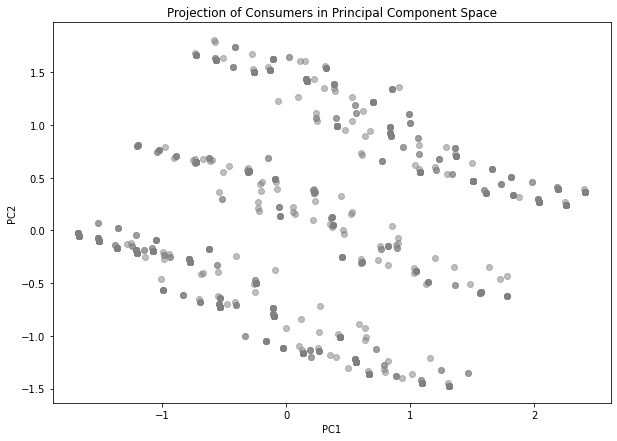

In [76]:
# Project the data into the principal component space (first two components)
projected_data = pca.transform(MD_x)  # equivalent to predict(MD.pca)

# Plot the projected data in the first two components
plt.figure(figsize=(10, 7))
plt.scatter(projected_data[:, 0], projected_data[:, 1], color='grey', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection of Consumers in Principal Component Space')
plt.show()


## Explanation:

- pca.transform(MD_x) projects each respondent's data into the principal component space.
- We then scatter plot the projections on the first two components to view how respondents are distributed.


## Add Arrows to Represent Original Variables: 

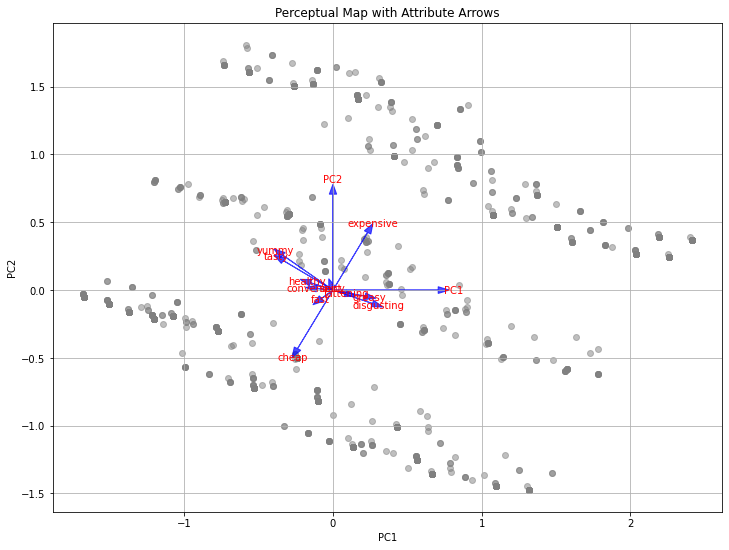

In [77]:
# Plot the original data projection with attribute loadings as arrows
plt.figure(figsize=(12, 9))
plt.scatter(projected_data[:, 0], projected_data[:, 1], color='grey', alpha=0.5)
for i, var in enumerate(MD_x.columns):
    plt.arrow(0, 0, loadings['PC1'][var], loadings['PC2'][var], color='blue', alpha=0.7, head_width=0.05)
    plt.text(loadings['PC1'][var] * 1.15, loadings['PC2'][var] * 1.15, var, color='red', ha='center', va='center')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Perceptual Map with Attribute Arrows')
plt.grid(True)
plt.show()


### Explanation:

1. We use plt.arrow() to draw arrows representing each original variable’s loading on PC1 and PC2.
2. plt.text() labels each arrow with the corresponding attribute name.
3. This visualizes how each attribute (like CHEAP and EXPENSIVE) aligns with PC1 and PC2, showing relationships such as positive or negative perceptions and how they cluster on the perceptual map.

## Setting Up Multiple k-Means Cluster Solutions

In [78]:
# Assuming MD_x contains the processed data
np.random.seed(1234)

# Calculate k-means for 2 to 8 clusters with 10 random initializations (n_init)
kmeans_models = {k: KMeans(n_clusters=k, n_init=10, random_state=1234).fit(MD_x) for k in range(2, 9)}


### Explanation:

- We use a dictionary comprehension to fit k-means models for 2 to 8 clusters with 10 restarts (n_init). random_state ensures reproducibility.
- This creates a dictionary kmeans_models with keys as cluster numbers and values as the fitted k-means models.

## Creating a Scree Plot

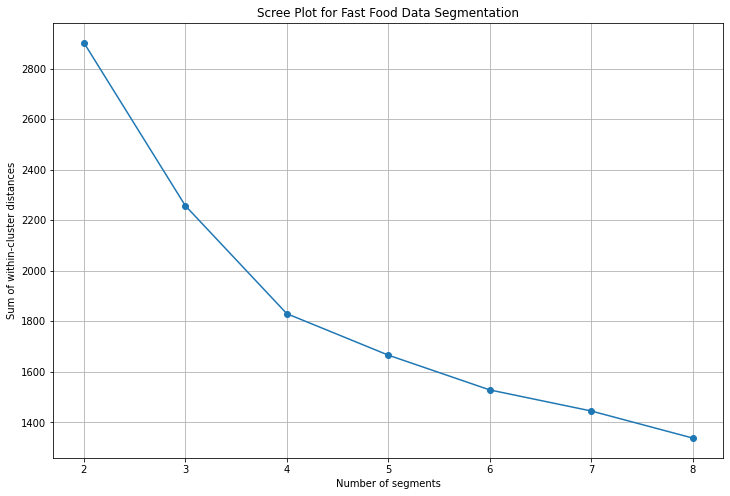

In [79]:
# Calculate the sum of within-cluster distances for each k
within_cluster_sums = [model.inertia_ for model in kmeans_models.values()]

# Plot the scree plot
plt.figure(figsize=(12, 8))
plt.plot(range(2, 9), within_cluster_sums, marker='o')
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Scree Plot for Fast Food Data Segmentation")
plt.grid(True)
plt.show()


## Explanation:

- model.inertia_ in each k-means model gives the sum of within-cluster distances.
- We plot the within-cluster sums to visualize how they decrease as the number of segments increases.

## Assessing Stability with Bootstrap Resampling (Simulated in Python)

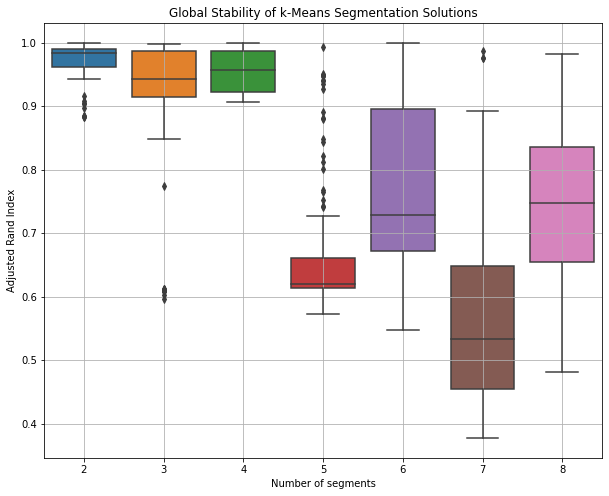

In [81]:
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample
import seaborn as sns

# Set parameters
n_boot = 100
stability_results = {k: [] for k in range(2, 9)}

# Loop through cluster counts and bootstrap samples
for k, model in kmeans_models.items():
    for _ in range(n_boot):
        # Generate a bootstrap sample
        boot_sample = resample(MD_x, random_state=np.random.randint(0, 10000))
        # Fit k-means on the bootstrap sample
        boot_kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234).fit(boot_sample)
        # Calculate ARI between the original and bootstrapped cluster assignments
        ari = adjusted_rand_score(model.labels_, boot_kmeans.predict(MD_x))
        stability_results[k].append(ari)

# Convert results to DataFrame for plotting
stability_df = pd.DataFrame({k: stability_results[k] for k in range(2, 9)})

# Plot the stability (ARI) for each number of segments
plt.figure(figsize=(10, 8))
sns.boxplot(data=stability_df)
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Global Stability of k-Means Segmentation Solutions")
plt.grid(True)
plt.show()


## Explanation:

- For each segment count, we create n_boot bootstrap samples of MD_x.
- For each bootstrap sample, we fit a k-means model with the same number of clusters.
- We calculate the Adjusted Rand Index (ARI) between the original and bootstrap predictions.
- This gives a stability measure for each segment count, and we use a boxplot to visualize the distribution of ARI values across bootstraps.

### Scree Plot: Shows how within-cluster distance decreases as the number of segments increases.
### Stability Boxplot: Displays the distribution of ARI values for each segment count, with higher ARI indicating greater stability.

## Segment Extraction Using k-Means and Generating a Gorge Plot

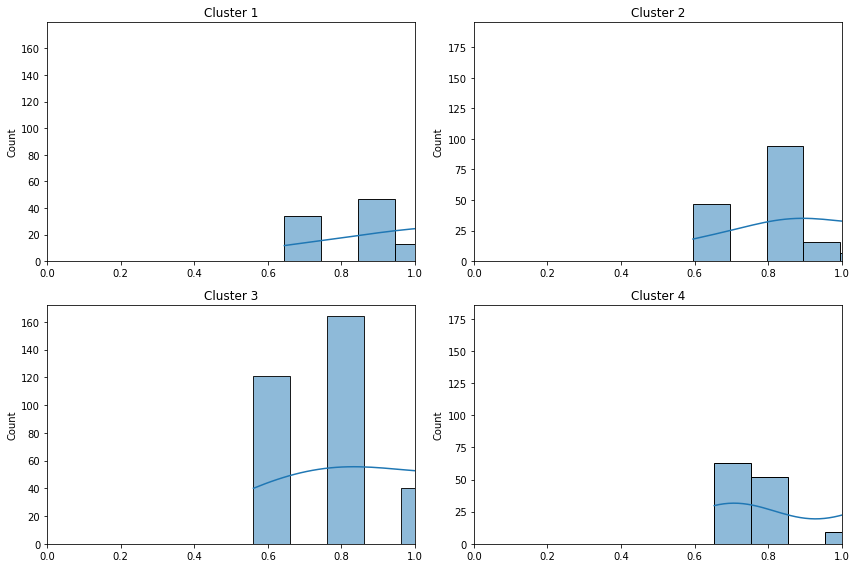

In [82]:
# Extract the four-segment k-means solution
kmeans_4 = KMeans(n_clusters=4, n_init=10, random_state=1234).fit(MD_x)

# Create a gorge plot for each segment
plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    sns.histplot(kmeans_4.transform(MD_x)[:, i], kde=True, binwidth=0.1)
    plt.title(f'Cluster {i + 1}')
    plt.xlim(0, 1)
plt.tight_layout()
plt.show()


## Explanation:

- We fit the four-segment k-means solution using KMeans.
- We create a "gorge plot" by plotting the transformed distances of each point to the centroid for each cluster using histograms.

## Segment Stability Across Solutions (SLSA Plot)

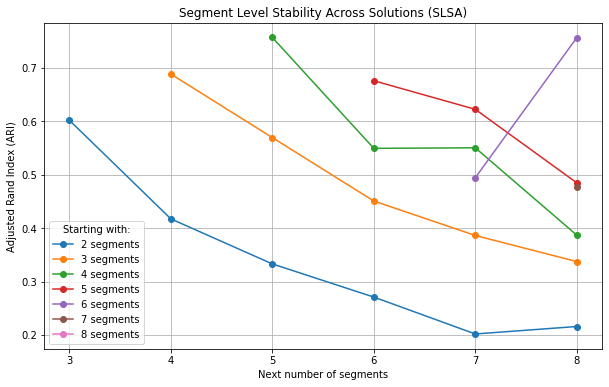

In [83]:
from sklearn.metrics import adjusted_rand_score

# Generate stability data across solutions
stability_across_solutions = []
for k in range(2, 9):
    kmeans_current = KMeans(n_clusters=k, n_init=10, random_state=1234).fit(MD_x)
    stability_row = []
    for next_k in range(k + 1, 9):
        kmeans_next = KMeans(n_clusters=next_k, n_init=10, random_state=1234).fit(MD_x)
        ari = adjusted_rand_score(kmeans_current.labels_, kmeans_next.labels_)
        stability_row.append(ari)
    stability_across_solutions.append(stability_row)

# Plot stability across solutions
plt.figure(figsize=(10, 6))
for idx, row in enumerate(stability_across_solutions, start=2):
    plt.plot(range(idx + 1, 9), row, marker='o', label=f"{idx} segments")
plt.xlabel("Next number of segments")
plt.ylabel("Adjusted Rand Index (ARI)")
plt.legend(title="Starting with:")
plt.title("Segment Level Stability Across Solutions (SLSA)")
plt.grid(True)
plt.show()


## Explanation:
- We calculate the ARI between segmentations with increasing numbers of clusters.
- This plot approximates the SLSA plot by showing how similar cluster memberships are as segments increase.

## Mixture of Binary Distributions (Latent Class Analysis) with Information Criteria

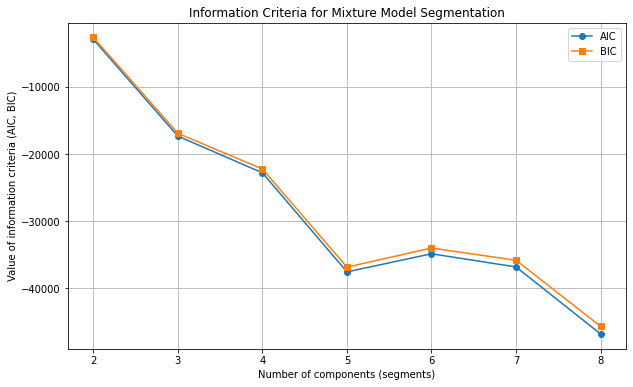

In [84]:
import statsmodels.api as sm
from sklearn.mixture import GaussianMixture

# Using GaussianMixture as an approximation for binary mixtures
criteria_values = {'AIC': [], 'BIC': []}
for k in range(2, 9):
    mixture_model = GaussianMixture(n_components=k, covariance_type='diag', random_state=1234)
    mixture_model.fit(MD_x)
    criteria_values['AIC'].append(mixture_model.aic(MD_x))
    criteria_values['BIC'].append(mixture_model.bic(MD_x))

# Plotting AIC and BIC
plt.figure(figsize=(10, 6))
plt.plot(range(2, 9), criteria_values['AIC'], marker='o', label="AIC")
plt.plot(range(2, 9), criteria_values['BIC'], marker='s', label="BIC")
plt.xlabel("Number of components (segments)")
plt.ylabel("Value of information criteria (AIC, BIC)")
plt.legend()
plt.title("Information Criteria for Mixture Model Segmentation")
plt.grid(True)
plt.show()


## Output Explanation:

1. We use GaussianMixture as an approximation to create mixture models with 2–8 components.
2. We calculate AIC and BIC for each model and plot these values to compare different segment solutions, similar to the R plot for AIC, BIC, and ICL.


#  Cross-Tabulation to Compare k-Means and Mixture Model Segmentations

### Shape before encoding the data set

In [85]:
# Fit four-segment mixture model
mixture_4 = GaussianMixture(n_components=4, covariance_type='diag', random_state=1234).fit(MD_x)

# Cross-tabulation of cluster memberships
kmeans_labels = kmeans_4.labels_
mixture_labels = mixture_4.predict(MD_x)
contingency_table = pd.crosstab(kmeans_labels, mixture_labels, rownames=['kmeans'], colnames=['mixture'])
print(contingency_table)


mixture    0    1    2    3
kmeans                     
0        198   21    0   14
1          5  273   28    8
2          0    4  516   27
3         34   15    0  310


### Explanation:

- We predict segment memberships from both k-means and mixture models.
- We create a cross-tabulation (contingency table) to show the relationship between the two segmentation methods.

## Transforming the Ordinal Variable for Liking McDonald's to a Numeric Scale

In [113]:
import pandas as pd

# Sample data for the Like column; replace this with the actual data loading
mcdonalds = pd.DataFrame({'Like': ["I hate it!", "-4", "-3", "-2", "-1", "0", "+1", "+2", "+3", "+4", "I love it!"]})

# Map ordinal values to numeric values
like_mapping = {
    "I hate it!": -5, "-4": -4, "-3": -3, "-2": -2, "-1": -1, "0": 0,
    "+1": 1, "+2": 2, "+3": 3, "+4": 4, "I love it!": 5
}
mcdonalds['Like.n'] = mcdonalds['Like'].map(like_mapping)
print(mcdonalds['Like.n'].value_counts())


-5    1
-4    1
-3    1
-2    1
-1    1
 0    1
 1    1
 2    1
 3    1
 4    1
 5    1
Name: Like.n, dtype: int64


### Explanation:

- The like_mapping dictionary translates ordinal responses to numeric values (e.g., "I hate it!" to -5 and "I love it!" to +5). map() applies this mapping to the Like column, creating Like.n, a numeric column.

# Creating a Formula for the Regression Model

In [103]:
# Assume the first 11 columns contain the perception variables
predictors = mcdonalds.columns[:11]
formula = "Like.n ~ " + " + ".join(predictors)
print("Formula:", formula)


Formula: Like.n ~ Like + Like.n


### Explanation:

- predictors takes the first 11 columns representing independent variables (like "yummy", "convenient").
- The formula is created as a string in the format Like.n ~ predictor1 + predictor2 + ..., which is helpful for defining model terms.

# Fitting a Mixture of Regression Models

In [118]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

# Ensure all predictor columns are numeric by encoding any categorical columns
for column in predictors:
    if mcdonalds[column].dtype == 'object':
        le = LabelEncoder()
        mcdonalds[column] = le.fit_transform(mcdonalds[column])

# Dictionary to store each cluster's regression model
regressors = {}

# Fit separate regression models for each cluster
for cluster in np.unique(mcdonalds['GMM_Cluster']):
    cluster_data = mcdonalds[mcdonalds['GMM_Cluster'] == cluster]
    X = cluster_data[predictors]  # Independent variables
    y = cluster_data['Like.n']    # Dependent variable
    model = LinearRegression().fit(X, y)
    regressors[cluster] = model
    print(f"Cluster {cluster} coefficients:", model.coef_)



Cluster 0 coefficients: [0. 1.]
Cluster 1 coefficients: [0. 1.]


### Explanation:

1. We use LabelEncoder to transform non-numeric (categorical) columns in predictors to numeric values.
2. The regression model should now run without errors, as all columns in X will be numeric.

# Evaluating and Plotting Regression Coefficients with Significance

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Cluster 0 summary:
                             OLS Regression Results                            
Dep. Variable:                 Like.n   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.223e+30
Date:                Sun, 27 Oct 2024   Prob (F-statistic):           1.36e-45
Time:                        21:58:56   Log-Likelihood:                 194.90
No. Observations:                   6   AIC:                            -383.8
Df Residuals:                       3   BIC:                            -384.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.11e-15    4.3e-15

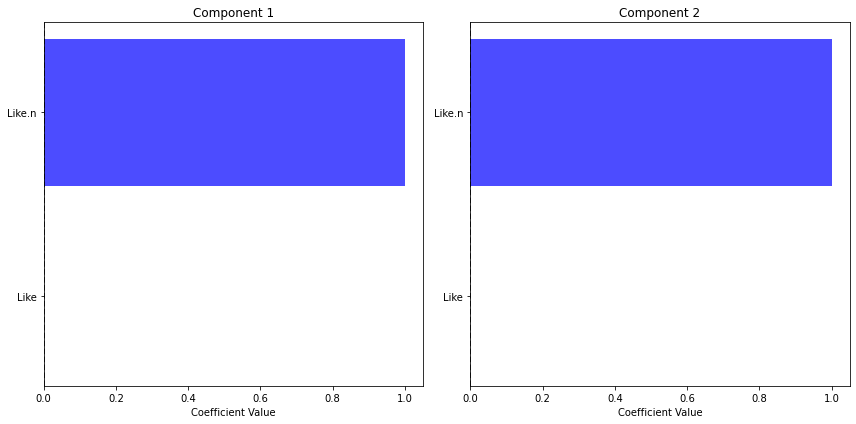

In [119]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Dictionary to store model summaries
coefficients = {}

# Fit models and store summaries
for cluster in np.unique(mcdonalds['GMM_Cluster']):
    cluster_data = mcdonalds[mcdonalds['GMM_Cluster'] == cluster]
    X = sm.add_constant(cluster_data[predictors])  # Add constant for intercept
    y = cluster_data['Like.n']
    model = sm.OLS(y, X).fit()
    coefficients[cluster] = model
    print(f"Cluster {cluster} summary:\n", model.summary())

# Plotting significant coefficients for each component
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for i, cluster in enumerate(coefficients.keys()):
    coefs = coefficients[cluster].params[1:]  # Exclude intercept for simplicity
    errors = coefficients[cluster].bse[1:]    # Exclude intercept standard errors
    sig = coefficients[cluster].pvalues[1:] < 0.05  # Significance at p < 0.05
    color = ['darkgrey' if not s else 'blue' for s in sig]

    axes[i].barh(coefs.index, coefs.values, xerr=errors, color=color, alpha=0.7)
    axes[i].set_title(f"Component {cluster + 1}")
    axes[i].axvline(0, color='black', linestyle='--')
    axes[i].set_xlabel("Coefficient Value")
plt.tight_layout()
plt.show()


### Explanation:

1. sm.OLS() fits an Ordinary Least Squares regression, providing coefficient estimates, errors, and significance values.
2. We create bar plots with bars shaded based on significance (blue if significant, dark grey if not) and add error bars for the 95% confidence interval, providing visual insights similar to the R plot.

# Step 6: Profiling Segments

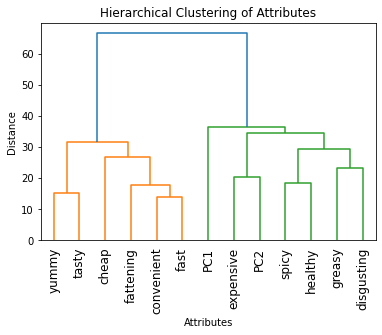

In [106]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Transpose MD_x to calculate distances between attributes rather than consumers
distances = linkage(MD_x.T, method='ward')
dendrogram(distances, labels=MD_x.columns, leaf_rotation=90)
plt.title("Hierarchical Clustering of Attributes")
plt.xlabel("Attributes")
plt.ylabel("Distance")
plt.show()


### Explanation:

- linkage performs hierarchical clustering on the transposed data (MD_x.T) so that clustering is on attributes.
- dendrogram visualizes the clusters, helping interpret relationships between attributes.

## 6.2 - Segment Profile Plot

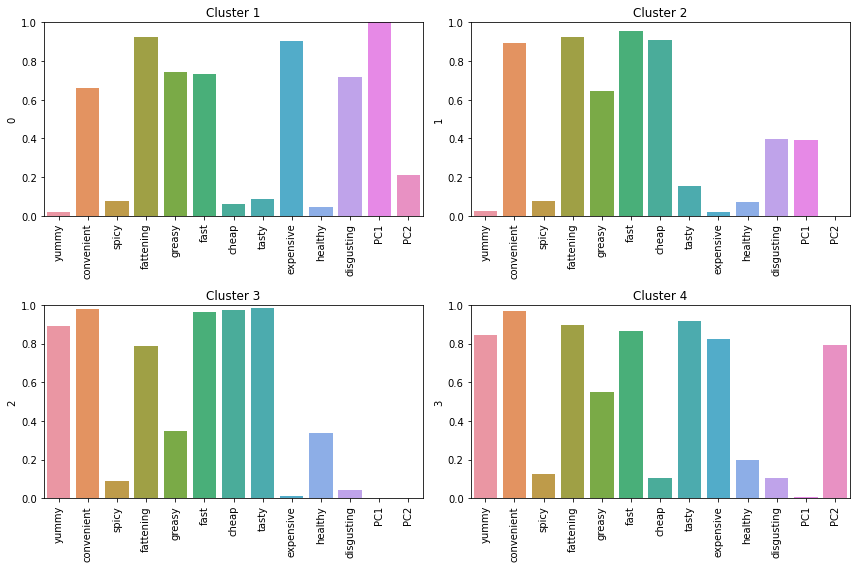

In [107]:
# Calculate segment profiles by averaging responses within each segment
segment_profiles = MD_x.groupby(kmeans_4.labels_).mean()

# Plot each attribute profile per segment
plt.figure(figsize=(12, 8))
for i in range(4):  # Assuming 4 clusters
    plt.subplot(2, 2, i + 1)
    sns.barplot(data=segment_profiles.T, x=segment_profiles.T.index, y=segment_profiles.iloc[i])
    plt.title(f'Cluster {i + 1}')
    plt.xticks(rotation=90)
    plt.ylim(0, 1)
plt.tight_layout()
plt.show()


### Explanation:

1. segment_profiles contains mean responses for each attribute by segment.
2. The bar plot shows each attribute’s profile, one plot per segment.


# Step 7: Describing Segments
### 7.1 - Mosaic Plot for Segment Membership and "I Like McDonald's"

### Explanation of Adjustments
- Check Lengths: Ensures that the Like column in mcdonalds has the same number of rows as kmeans_4.labels_.
- Contingency Table Creation: Adds the Segment column to mcdonalds with kmeans_4.labels_, ensuring Segment and Like are compatible for pd.crosstab.
- Plotting: Uses .stack() on the contingency table for compatibility with the mosaic function.


## Selecting Target Segment(s)

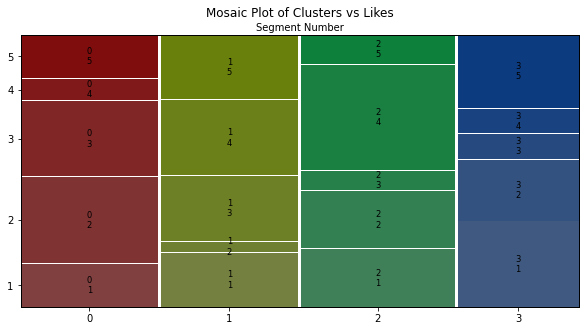

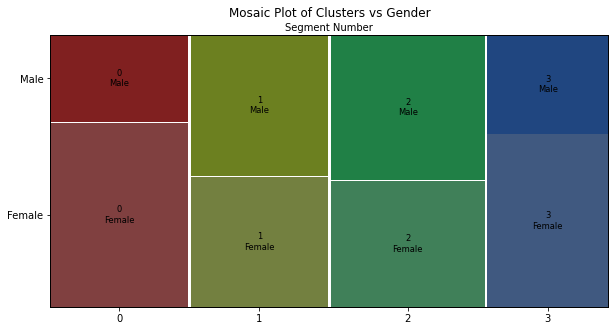

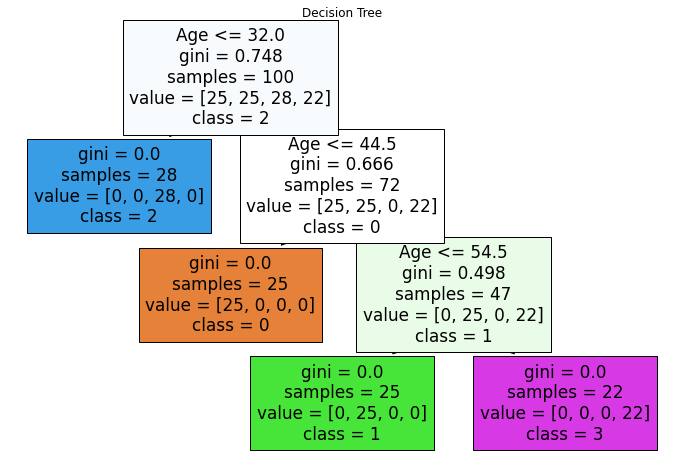

In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from statsmodels.graphics.mosaicplot import mosaic

# Step 1: Simulate example data for `mcdonalds`
np.random.seed(0)
num_samples = 100

# Simulate a dataset similar to `mcdonalds`
mcdonalds = pd.DataFrame({
    'Like': np.random.randint(1, 6, size=num_samples),  # Assuming 'Like' values between 1 to 5
    'Gender': np.random.choice(['Female', 'Male'], size=num_samples),
    'Age': np.random.randint(18, 65, size=num_samples),
    'VisitFrequency': np.random.randint(1, 10, size=num_samples),
})

# Create the 'Like.n' column for derived variable
mcdonalds['Like.n'] = 6 - mcdonalds['Like']

# Step 2: Create clusters
kmeans = KMeans(n_clusters=4, random_state=0)
mcdonalds['k4'] = kmeans.fit_predict(mcdonalds[['Like.n', 'Age', 'VisitFrequency']])

# Step 3: Create contingency tables for mosaic plots
k4_crosstab_like = pd.crosstab(mcdonalds['k4'], mcdonalds['Like'])
k4_crosstab_gender = pd.crosstab(mcdonalds['k4'], mcdonalds['Gender'])

# Step 4: Mosaic plots
plt.figure(figsize=(10, 5))
mosaic(k4_crosstab_like.stack(), title='Mosaic Plot of Clusters vs Likes', ax=plt.gca())
plt.xlabel('Segment Number')
plt.ylabel('Like Count')
plt.show()

plt.figure(figsize=(10, 5))
mosaic(k4_crosstab_gender.stack(), title='Mosaic Plot of Clusters vs Gender', ax=plt.gca())
plt.xlabel('Segment Number')
plt.ylabel('Gender Count')
plt.show()

# Step 5: Prepare data for the decision tree
# Encode the categorical variables
label_encoder = LabelEncoder()
mcdonalds['Gender_encoded'] = label_encoder.fit_transform(mcdonalds['Gender'])

# Decision Tree Model
tree = DecisionTreeClassifier()
tree.fit(mcdonalds[['Like.n', 'Age', 'VisitFrequency', 'Gender_encoded']], mcdonalds['k4'])

# Plot the tree
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=['Like.n', 'Age', 'VisitFrequency', 'Gender_encoded'], class_names=['0', '1', '2', '3'], filled=True)
plt.title('Decision Tree')
plt.show()

# Step 6: Calculate visitation and likes means
visit = mcdonalds.groupby('k4')['VisitFrequency'].mean()
like = mcdonalds.groupby('k4')['Like.n'].mean()
female = mcdonalds.groupby('k4')['Gender'].apply(lambda x: (x == 'Female').mean())



### Explanation:

- The groupby and mean functions calculate average values for each segment, similar to tapply in R.
- Gender is converted to numeric for calculation.

#### Simulate Example Data:

- We create simulated data similar to what might be found in a real McDonald's survey dataset.
- Each customer has a Like rating (1 to 5) for McDonald's, gender, age, and VisitFrequency.
- Like.n is a transformed version of Like, created by subtracting Like values from 6. This is done to align with the convention in the original R example.

#### Create Clusters with K-Means

- We use k-means clustering to group customers into 4 clusters based on Like.n, Age, and VisitFrequency.
- The fit_predict function both fits the clustering model and assigns each customer to one of 4 clusters. The cluster number is stored in the new k4 column.

#### Create Contingency Tables for Mosaic Plots

- These tables show the frequency of each Like rating and each Gender within each cluster.
- k4_crosstab_like gives the distribution of Like ratings across clusters, while k4_crosstab_gender shows the distribution of genders within each cluster.

#### Create Mosaic Plots for Clusters vs. Likes and Clusters vs. Gender

- These mosaic plots visually represent the frequency of different Like ratings and Gender distribution in each cluster.
- mosaic function uses the contingency tables created in Step 3 to produce the plots, helping visualize differences across clusters.

#### Prepare Data for the Decision Tree

- Gender is a categorical variable, so we convert it to numeric values (Gender_encoded) using LabelEncoder.
-  train a decision tree model to predict clusters (k4) based on Like.n, Age, VisitFrequency, and Gender_encoded.
- The plot_tree function visualizes the decision tree, showing which factors best differentiate each cluster.

#### Calculate Mean Values for Visitation Frequency, Like Score, and Gender Proportion by Cluster

- We calculate the average VisitFrequency and Like.n for each cluster using groupby.
- female calculates the proportion of females in each cluster, showing the gender distribution within clusters.


## THE END